# Tutoriel d'exemple de résolution d'un problème de machine learning

L'objectif est d'estimer les futurs prix d'un bien immobilier.

Dans ce cas nous avons affaire à un machine learning supervisé, en utilisant la régression linéaire.

Grace a ce notebook vous saurez comment faire une regression linéaire et faire une estimation (prédiction)

## Code 

## Importation de librairies 

In [2]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
import numpy as np

La première étape est d'importer le dataset california_housing et de le transformer en dataframe.



In [3]:
california_housing = fetch_california_housing(as_frame=True)

Nous pouvons avoir un premier aperçu de la description disponible

In [4]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Cette description nous montre 20640 entrées sur un groupe de 8 prédictions. On y retrouve le médian des revenus et des âges, la moyenne de chambre ou de salle de bain dans un foyer.

Chaque bloc de groupe d'une population contient 600 à 3000 personnes. Et pour chacune de ces groupes résidant dans un même foyer, nous avons un jeu de données sur la moyenne des pièces et chambres. Ces données resortent principalement des maisons peu habitées, vides comme des résidences de vacances.

In [5]:
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### Nous allons vérifier les données:


-il y a 20640 échantillons et 9 colonnes.

-toutes les colonnes sont des nombres flottants

-aucune n'est vide

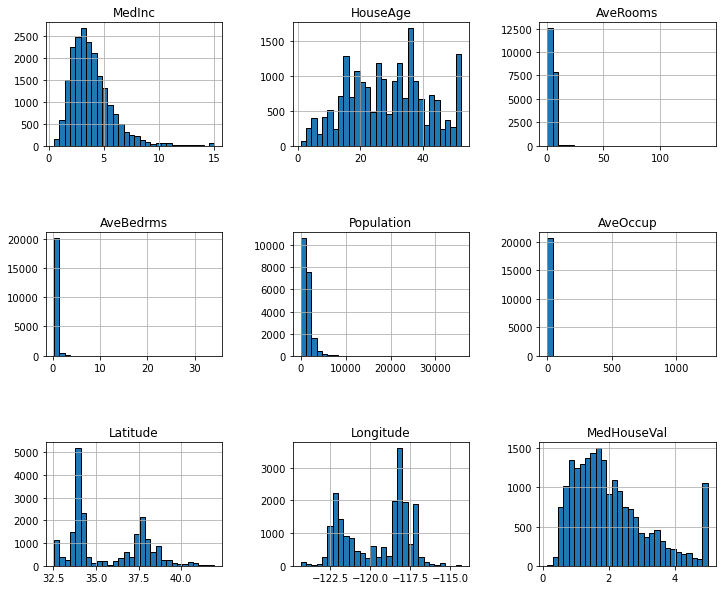

In [6]:
california_housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

On voir ici les données sous la forme d'histogrammes pour visualiser les fréquences de répartition des données pour chaque feature (colonnes).

La plupart des graphiques sont plus ou moins uniformes. Nous remarquons cependant que les graphiques des chambres, salles de bains, populations et des occupations ont sûrement des données aberrantes. En effet, nous pouvons voir que sur la majeure partie de l'axe des absices, le modèle est vide.


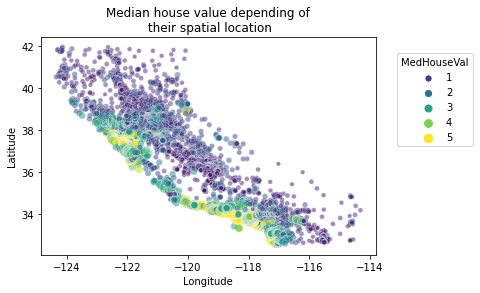

In [20]:
import seaborn as sns

sns.scatterplot(data=california_housing.frame, x="Longitude", y="Latitude",
                size="MedHouseVal", hue="MedHouseVal",
                palette="viridis", alpha=0.5)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95),
           loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

In [23]:
import pandas as pd

rng = np.random.RandomState(0)
indices = rng.choice(np.arange(california_housing.frame.shape[0]), size=500,
                     replace=False)

# Drop the unwanted columns
columns_drop = ["Longitude", "Latitude"]
subset = california_housing.frame.iloc[indices].drop(columns=columns_drop)
# Quantize the target and keep the midpoint for each interval
subset["MedHouseVal"] = pd.qcut(subset["MedHouseVal"], 6, retbins=False)
subset["MedHouseVal"] = subset["MedHouseVal"].apply(lambda x: x.mid)

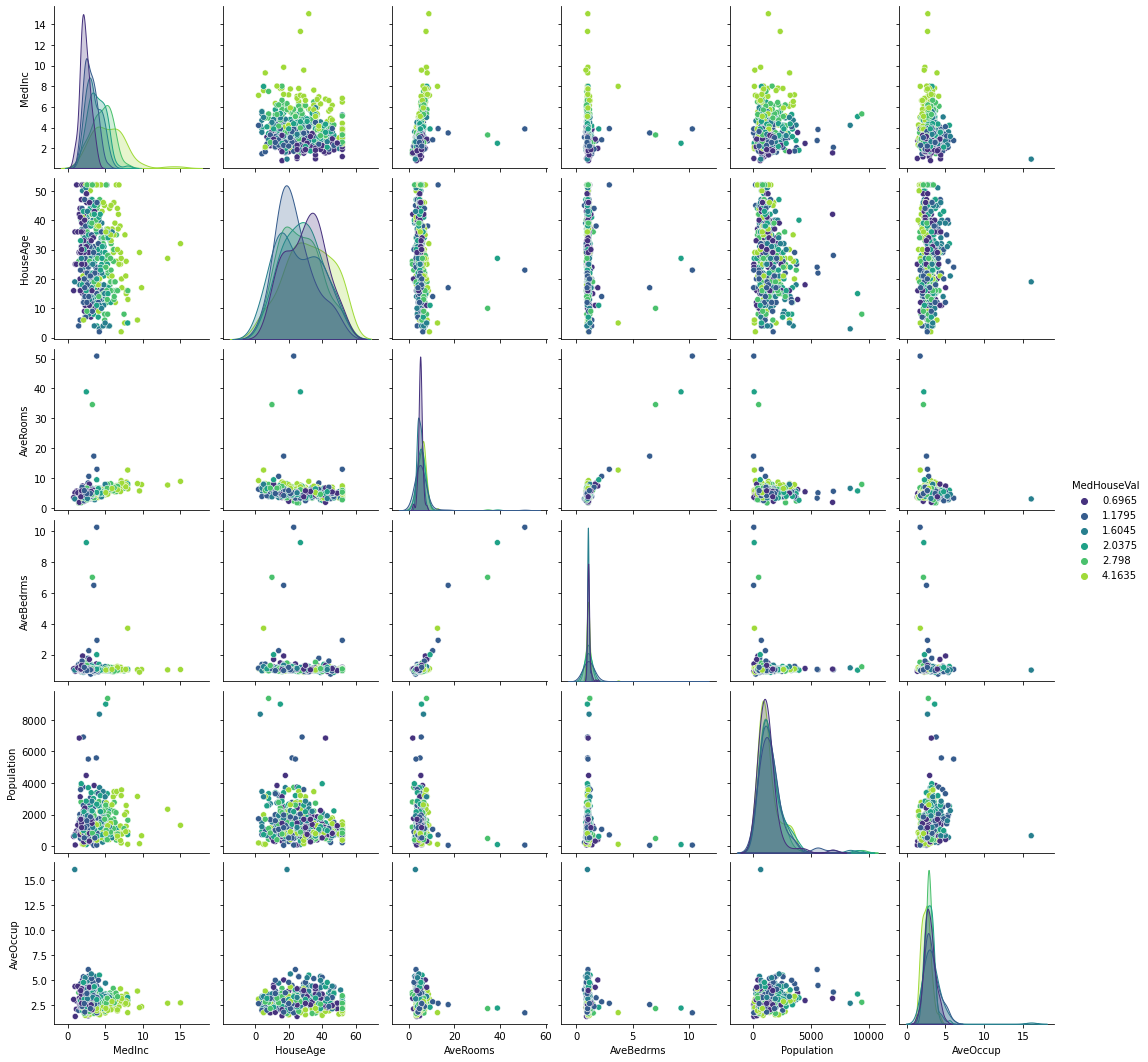

In [24]:
_ = sns.pairplot(data=subset, hue="MedHouseVal", palette="viridis")

## Phase d'apprentissage du modèle

La première étape dans la construction de notre modèle consiste à entraîner ce dernier. Dans cette étape, nous allons construire notre modèle en lui donnant un certain nombre d'exemples depuis notre base de données. La règle de base lors de cette étape est de séparer la base de données en deux : une partie pour l'apprentissage et une partie pour le test. Ceci afin de ne pas montrer lors de la phase de test des exemples de chiffres qui auraient servis lors de la phase d'apprentissage, car alors le test serait biaisé.

In [25]:

X_train, X_test, y_train, y_test = train_test_split(
    np.array(california_housing.data), np.array(california_housing.target),
         test_size=0.02, shuffle=False)

In [18]:
# Split the data into training/testing sets
X_train = np.array(X_train)
X_test = np.array(X_test)

# Use only one feature


# Split the targets into training/testing sets
y_train = np.array(y_train)
y_test = np.array(y_test)


X_train = X_train[:, np.newaxis, 2]
X_test = X_test[:, np.newaxis, 2]

Puis nous mettons en place notre modèle, l'entraînons et visualisons les résultats de l'entraînement :


Coefficients: 
 [0.06865483]
Mean squared error: 1.02
Coefficient of determination: 0.09


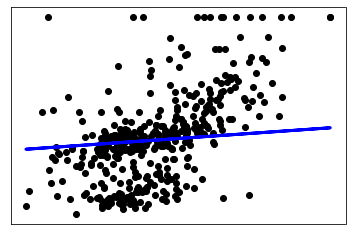

In [19]:
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()